In [28]:
# Get rid of pesky warnings
import warnings
warnings.filterwarnings('ignore')

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

def extract_rgb_means(folder_path):

    # Initialize lists to store statistics
    red_means = []
    green_means = []
    blue_means = []

    # Iterate through all image files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            # Construct the full path to the image
            image_path = os.path.join(folder_path, filename)
            
            # Load the image
            image = cv2.imread(image_path)
            
            if image is not None:
                # Convert BGR to RGB
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # Extract individual color channels
                red_channel = image_rgb[:, :, 0]
                green_channel = image_rgb[:, :, 1]
                blue_channel = image_rgb[:, :, 2]
                
                # Calculate mean for each color channel
                r_mean = np.mean(red_channel)
                g_mean = np.mean(green_channel)
                b_mean = np.mean(blue_channel)

                red_means.append(r_mean)
                green_means.append(g_mean)
                blue_means.append(b_mean)

    # Create DataFrames for each color
    df_red = pd.DataFrame({"Color": "red", "Mean": red_means})
    df_green = pd.DataFrame({"Color": "green", "Mean": green_means})
    df_blue = pd.DataFrame({"Color": "blue", "Mean": blue_means})

    # Concatenate DataFrames
    df_means = pd.concat([df_red, df_green, df_blue], ignore_index=True)

    # Plot boxplot
    colors = {'red': 'red', 'green': 'green', 'blue': 'blue'}

    sns.boxplot(data=df_means, x="Mean", y="Color", palette=colors)
    plt.title('Distribution of Mean Pixel Intensity by Color')
    plt.xlabel('Mean Intensity')
    plt.ylabel('Color')
    plt.show()


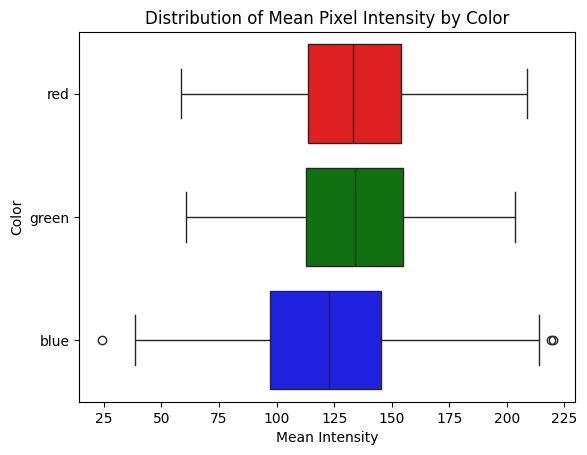

In [31]:
# Create visualization for Monet images
extract_rgb_means('data/monet_jpg/')

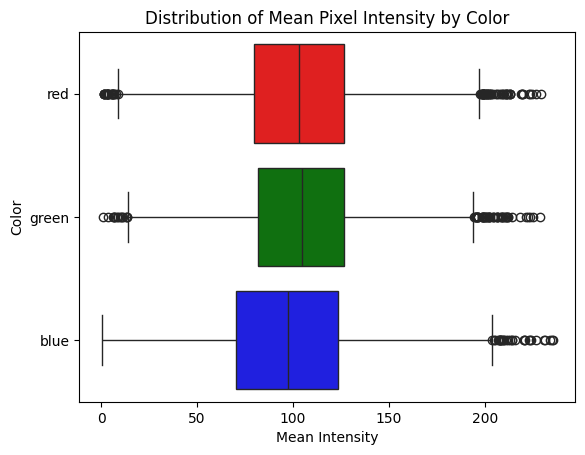

In [32]:
# Create visualization for input images
extract_rgb_means('data/photo_jpg/')

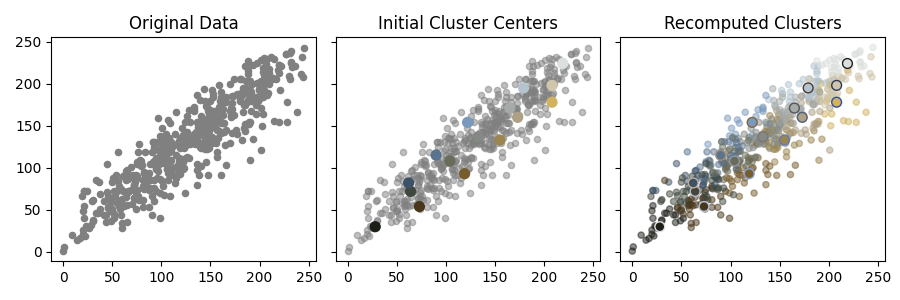

In [37]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Function to perform k-means clustering
def k_means_clustering(X, K, MAXITER):
    # Initialize cluster centers randomly
    whichinit = np.random.choice(len(X), size=K, replace=False)
    CC = X[whichinit, :].copy()
    
    # Main Expectation-Maximization loop
    for i in range(MAXITER):
        # Compute distance between data points and cluster centers
        D = cdist(X, CC, 'euclidean')
        whichCluster = np.argmin(D, axis=1)
        
        # Recompute cluster centers
        for c in range(K):
            if np.any(whichCluster == c):
                CC[c, :] = np.mean(X[whichCluster == c, :], axis=0)
    
    return CC, whichCluster

# Parameters
K = 16
MAXITER = 20
NUMPOINTS = 500

# Load images from folder
folder_path = 'data/monet_jpg'
image_files = os.listdir(folder_path)

# Combine data from multiple images
X_combined = []
for file in image_files:
    # Load image
    image_path = os.path.join(folder_path, file)
    image = io.imread(image_path)
    
    # Flatten image
    X_image = np.stack([image[..., i].ravel() for i in range(3)]).T
    X_combined.append(X_image)

# Concatenate data from all images
X_combined = np.concatenate(X_combined, axis=0)

# Perform k-means clustering on combined data
CC, whichCluster = k_means_clustering(X_combined, K, MAXITER)

# Visualize results
rands = np.sort(np.random.choice(len(X_combined), size=NUMPOINTS, replace=False))

f, ax = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax[0].scatter(X_combined[rands, 0], X_combined[rands, 1], c='gray', s=20)
ax[0].set_title('Original Data')

ax[1].scatter(X_combined[rands, 0], X_combined[rands, 1], c='gray', alpha=.5, s=20)
ax[1].scatter(CC[:, 0], CC[:, 1], c=CC/255, s=50)
ax[1].set_title('Initial Cluster Centers')

pointColors = CC[whichCluster[rands], :]
clusterEdgeColors = 1 - CC/255

ax[2].scatter(X_combined[rands, 0], X_combined[rands, 1], c=pointColors/255, alpha=.5, s=20)
ax[2].scatter(CC[:, 0], CC[:, 1], c=CC/255, edgecolors=clusterEdgeColors, s=50)
ax[2].set_title('Recomputed Clusters')

plt.tight_layout()
plt.show()


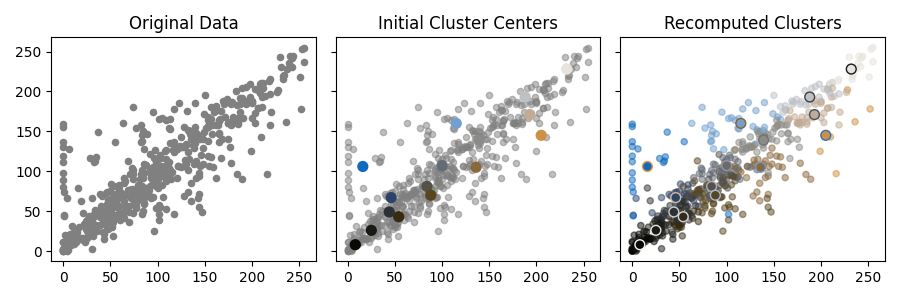

In [38]:
# Load images from folder
folder_path = 'data/photo_jpg'
image_files = os.listdir(folder_path)

# Combine data from multiple images
X_combined = []
for file in image_files[:100]:
    # Load image
    image_path = os.path.join(folder_path, file)
    image = io.imread(image_path)
    
    # Flatten image
    X_image = np.stack([image[..., i].ravel() for i in range(3)]).T
    X_combined.append(X_image)

# Concatenate data from all images
X_combined = np.concatenate(X_combined, axis=0)

# Perform k-means clustering on combined data
CC, whichCluster = k_means_clustering(X_combined, K, MAXITER)

# Visualize results
rands = np.sort(np.random.choice(len(X_combined), size=NUMPOINTS, replace=False))

f, ax = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax[0].scatter(X_combined[rands, 0], X_combined[rands, 1], c='gray', s=20)
ax[0].set_title('Original Data')

ax[1].scatter(X_combined[rands, 0], X_combined[rands, 1], c='gray', alpha=.5, s=20)
ax[1].scatter(CC[:, 0], CC[:, 1], c=CC/255, s=50)
ax[1].set_title('Initial Cluster Centers')

pointColors = CC[whichCluster[rands], :]
clusterEdgeColors = 1 - CC/255

ax[2].scatter(X_combined[rands, 0], X_combined[rands, 1], c=pointColors/255, alpha=.5, s=20)
ax[2].scatter(CC[:, 0], CC[:, 1], c=CC/255, edgecolors=clusterEdgeColors, s=50)
ax[2].set_title('Recomputed Clusters')

plt.tight_layout()
plt.show()


# Trying out SSIM  
https://medium.com/srm-mic/all-about-structural-similarity-index-ssim-theory-code-in-pytorch-6551b455541e

SSIM is used as a metric to measure the similarity between two given images
